In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import re
import unicodedata

%precision 3
%matplotlib inline

In [2]:
sns.set()
sns.set_style('darkgrid',{"axes.facecolor": ".9"})
sns.set_context('notebook')

In [3]:
from functions import *

# データの読み込み・整形

In [74]:
'''************************************************************
** データの読み込み
************************************************************'''
df_columns = ('name', 'play', 'like', 'creator', 'size', 'date', 'description')
df_raw = pd.read_csv('data/data_gamejam.csv', encoding="utf_8_sig", names=df_columns)

# 区切り行を検出
df = df_raw[df_raw['name'] != "page"]
df.reset_index(inplace=True, drop=True)

df = df[df['description'].str.contains('#ClusterGAMEJAM', case=False)]


'''************************************************************
** 文字列の整形
************************************************************'''
index = 0
raw_p = df['play']
p = []
for d in raw_p:
    i = int(str(d).replace('.', ''))
    tmp = kans2num(str(i))
    p.append(tmp*10)
    index += 1
df['play'] = p


'''************************************************************
** データ型の変換
************************************************************'''
df['like'] = df['like'].astype(int)
df['play'] = df['play'].astype(int)
df['size'] = df['size'].str[:-2]
df['size'] = df['size'].astype(int)
date_list = df['date'].str.split('（|）', expand=True)
tmp = date_list[0] + date_list[2]
df['date'] = pd.to_datetime(tmp, format='%Y/%m/%d %H:%M')


'''************************************************************
** 外れ値の除去
************************************************************'''
# labels_outlier = ['play', 'like']

# for l in labels_outlier:
#     s = df[l]
#     bottom, up = findOutlier(s)
#     index = np.where((s <= bottom) | (up <= s))
#     print(bottom, up)
#     print(len(index))
#     df.drop(df.index[index[0]], inplace=True)

df


,name,play,like,creator,size,date,description
1,ジオメトリック跳梁跋扈,47,2,すずしき,25,2021-08-16 18:24:00,迫りくる敵から魔方陣を守れ！ 目指せ武器コンプリート(全6種) レベルは一気に上げすぎないの...
3,JUMP_SQUARE,9,0,hinoki_rocker,35,2021-08-16 10:07:00,#ClusterGAMEJAM 上のフロアを目指しましょう
5,都市脱出,17,0,水音 凪,4,2021-08-16 07:47:00,アセットとテレポーテーションギミックを使ったタイムアタック脱出ゲーム ギミックは未検証なので...
9,スーパーエターナルエジプト（予備）,26,2,にくきゅう,23,2021-08-15 22:41:00,"古代エジプト人は、墓やミイラを作ることで永遠性を探求した。 その中で、""ホップ、ステップ、ジ..."
10,バウンシング・シューティング・アクション2,37,1,waigoma,0,2021-08-15 22:41:00,バウンスフロアでホップ、宙でステップ、ジャンプしてショット!!! バウンシングシューティング...
...,...,...,...,...,...,...,...
307,スーパーエターナルエジプト,44,4,影織 (Kageori),29,2021-08-14 00:23:00,"古代エジプト人は、墓やミイラを作ることで永遠性を探求した。 その中で、""ホップ、ステップ、ジ..."
308,Sci-Fi Leap・Beercity,162,18,龍飛,69,2021-08-14 00:12:00,世界中のあらゆるビールが集まる、眠らない街「パテカトル」。 相容れない存在であったビールとパ...
309,Jump & Drop Battle !!,282,37,konkon,14,2021-08-13 23:46:00,つるはしでみんな落とせ！ ホップステップジャンプで相手を一掃！！ 一番しぶとく生き残ったやつ...
310,HYPER JUMP MAZE,34,2,一箱 / BOXP,0,2021-08-13 23:22:00,突如現れた空にうかぶ天空の島々 そこには遥か空の彼方、天空の宝につづく道があるという 島の中...


In [54]:
df.describe()

,play,like,size
count,6.000000,6.00000,6.000000
mean,25.333333,2.00000,16.500000
std,17.682383,2.75681,15.215124
min,5.000000,0.00000,0.000000
25%,11.000000,0.00000,4.250000
50%,24.000000,1.00000,15.000000
75%,40.000000,2.75000,28.750000
max,47.000000,7.00000,35.000000


(array([ 18.,   7.,  29.,  33.,  10.,  26., 154.,   8.,   2.,   1.]),
 array([738015.953, 738016.235, 738016.516, 738016.797, 738017.079,
        738017.36 , 738017.641, 738017.923, 738018.204, 738018.485,
        738018.767]),
 <a list of 10 Patch objects>)

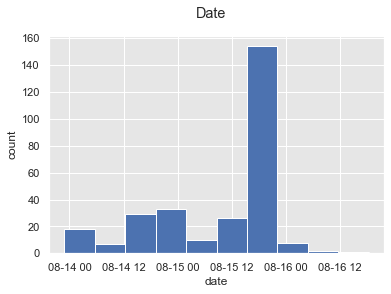

In [75]:
fig, ax = plt.subplots(figsize=(6,4))
fig.suptitle('Date')
ax.set_xlabel('date')
ax.set_ylabel('count')
ax.hist(df['date'])